In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pylab as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Eg: 1

In [3]:
dataset = {
    'color': ['Red', 'green', 'Red', 'Blue', 'Red', 'green', 'Blue', 'Red', 'Blue', 'green'],
    'target': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
}

In [4]:
data = pd.DataFrame(dataset)

In [5]:
data

,color,target
0,Red,1
1,green,0
2,Red,1
3,Blue,0
4,Red,1
5,green,0
6,Blue,0
7,Red,1
8,Blue,0
9,green,1


In [6]:
type(data), data.dtypes

(pandas.core.frame.DataFrame,
 color     object
 target     int64
 dtype: object)

## One hot encoding

In [8]:
ohe = OneHotEncoder(sparse_output=False)

In [9]:
encoded_data =  ohe.fit_transform(data[['color']])

In [10]:
encoded_data

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [11]:
ohe.get_feature_names_out()

array(['color_Blue', 'color_Red', 'color_green'], dtype=object)

In [12]:
tree = DecisionTreeClassifier(criterion='entropy')

In [13]:
tree.fit(encoded_data, data['target'])

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'color_green <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1')]

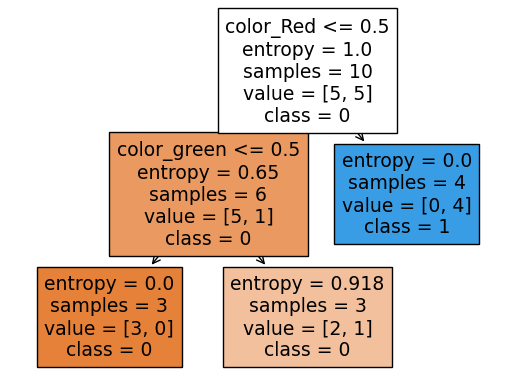

In [14]:
plot_tree(tree, feature_names=ohe.get_feature_names_out(), class_names=['0', '1'], filled=True)

### Eg: 2

In [16]:
dataset = {
    'color' : ['Red', 'green', 'Red', 'Blue','Red', 'green','Blue','Red', 'Blue', 'green'],
    'Size' : ['Small', 'Large', 'Medium','Small', 'Large', 'Medium','Small', 'Large', 'Medium','Large' ],
    'Weight':[1,2,4,1,3,2,4,5,3,2],
    'target' : [1,0,1,0,1,0,0,1,0,1]
}

In [17]:
data = pd.DataFrame(dataset)

In [18]:
data[:3]

,color,Size,Weight,target
0,Red,Small,1,1
1,green,Large,2,0
2,Red,Medium,4,1


In [19]:
ohe = OneHotEncoder(sparse_output=False)

In [20]:
encoded_data = ohe.fit_transform(data[['color', 'Size']])

In [21]:
encoded_data[:4]

array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.]])

In [22]:
column_name = ohe.get_feature_names_out()
column_name

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small'], dtype=object)

In [23]:
encoded_df =  pd.DataFrame(encoded_data, columns= column_name)

In [24]:
encoded_df[:3]

,color_Blue,color_Red,color_green,Size_Large,Size_Medium,Size_Small
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
final_df = pd.concat([encoded_df, data[['Weight', 'target']]], axis = 1)

In [26]:
final_df[:3]

,color_Blue,color_Red,color_green,Size_Large,Size_Medium,Size_Small,Weight,target
0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.0,0.0,1.0,1.0,0.0,0.0,2,0
2,0.0,1.0,0.0,0.0,1.0,0.0,4,1


In [27]:
X = final_df.drop(columns= 'target')

In [28]:
y = final_df['target']

In [29]:
tree = DecisionTreeClassifier()

In [30]:
tree.fit(X, y)

DecisionTreeClassifier()

In [31]:
X.columns.values

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small', 'Weight'], dtype=object)

[Text(0.6, 0.8333333333333334, 'color_Red <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.4, 0.5, 'Size_Large <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1')]

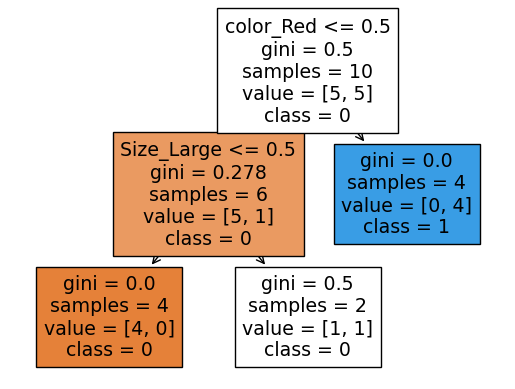

In [32]:
plot_tree(tree, feature_names=X.columns.values, class_names=['0', '1'], filled=True)

In [33]:
tree.feature_importances_

array([0.        , 0.83333333, 0.        , 0.16666667, 0.        ,
       0.        , 0.        ])

In [34]:
tree.feature_names_in_

array(['color_Blue', 'color_Red', 'color_green', 'Size_Large',
       'Size_Medium', 'Size_Small', 'Weight'], dtype=object)

In [35]:
0.83333333 + 0.16666667

1.0

### Eg: 2

In [37]:
iris = load_iris()

In [38]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
iris_df = pd.DataFrame(data= iris.data, columns=iris.feature_names)

In [41]:
iris_df[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [42]:
iris_df.shape

(150, 4)

In [43]:
iris_df['target'] = iris.target

In [44]:
iris_df[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [45]:
X = iris_df.drop(columns='target')
y = iris_df['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=3)

In [47]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

### Criterion

In [49]:
def fit_result(param):
    tree = DecisionTreeClassifier(criterion= param, random_state= 3)
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    print('Train Accuracy: ', accuracy_score(y_train, train_pred), "Test Accuracy: ", accuracy_score(y_test, test_pred))

In [50]:
fit_result(param= 'entropy')

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


In [51]:
fit_result('gini')

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


### Max depth

In [53]:
def fit_result(param):
    tree = DecisionTreeClassifier(max_depth= param, random_state=9)
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    print('Train Accuracy: ', accuracy_score(y_train, train_pred), "Test Accuracy: ", accuracy_score(y_test, test_pred))

In [54]:
fit_result(param=1)

Train Accuracy:  0.6571428571428571 Test Accuracy:  0.6888888888888889


In [55]:
fit_result(param=2)

Train Accuracy:  0.9619047619047619 Test Accuracy:  0.9333333333333333


In [56]:
fit_result(param=3)

Train Accuracy:  0.9714285714285714 Test Accuracy:  0.9333333333333333


In [57]:
fit_result(param=4)

Train Accuracy:  0.9809523809523809 Test Accuracy:  0.9111111111111111


In [58]:
fit_result(param=5)

Train Accuracy:  0.9904761904761905 Test Accuracy:  0.9333333333333333


In [59]:
fit_result(param=6)

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


In [60]:
fit_result(param=7)

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


In [61]:
fit_result(param=8)

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


### min_sample_split

In [119]:
X_train.shape

(105, 4)

In [121]:
def fit_result(param):
    tree = DecisionTreeClassifier(min_samples_split= param, random_state=9)
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    print('Train Accuracy: ', accuracy_score(y_train, train_pred), "Test Accuracy: ", accuracy_score(y_test, test_pred))

In [123]:
fit_result(param=2)

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


In [125]:
fit_result(param=3)

Train Accuracy:  0.9809523809523809 Test Accuracy:  0.9111111111111111


In [127]:
fit_result(param=4)

Train Accuracy:  0.9809523809523809 Test Accuracy:  0.9111111111111111


In [129]:
fit_result(param=5)

Train Accuracy:  0.9809523809523809 Test Accuracy:  0.9111111111111111


In [131]:
fit_result(param=6)

Train Accuracy:  0.9714285714285714 Test Accuracy:  0.9111111111111111


In [133]:
fit_result(param=7)

Train Accuracy:  0.9714285714285714 Test Accuracy:  0.9111111111111111


In [135]:
fit_result(param=10)

Train Accuracy:  0.9714285714285714 Test Accuracy:  0.9111111111111111


In [137]:
fit_result(param=20)

Train Accuracy:  0.9714285714285714 Test Accuracy:  0.9111111111111111


In [139]:
fit_result(param=1000)

Train Accuracy:  0.34285714285714286 Test Accuracy:  0.3111111111111111


In [141]:
fit_result(param=100)

Train Accuracy:  0.6571428571428571 Test Accuracy:  0.6888888888888889


In [143]:
fit_result(param=50)

Train Accuracy:  0.9619047619047619 Test Accuracy:  0.9333333333333333


In [145]:
y_train.values

array([1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0,
       2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2])

In [151]:
# plot_tree(tree, feature_names=X_train.columns.values, class_names=['0', '1', '2'], filled=True)


### min_sample_leaf

In [204]:
def fit_result(param):
    tree = DecisionTreeClassifier(min_samples_leaf= param, random_state=9) #instantiation - empty object
    tree.fit(X_train, y_train) #fitted - learned
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    print('Train Accuracy: ', accuracy_score(y_train, train_pred), "Test Accuracy: ", accuracy_score(y_test, test_pred))
    return tree

In [206]:
tree_output = fit_result(param=10)

Train Accuracy:  0.9619047619047619 Test Accuracy:  0.9333333333333333


In [208]:
type(tree_output)

sklearn.tree._classes.DecisionTreeClassifier

In [212]:
# tree_output

In [172]:
# del tree_output

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]\nclass = 1'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = 0'),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]\nclass = 1'),
 Text(0.25, 0.375, 'sepal width (cm) <= 2.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = 1'),
 Text(0.125, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]\nclass = 1'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]\nclass = 1'),
 Text(0.75, 0.375, 'petal width (cm) <= 1.85\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]\nclass = 2'),
 Text(0.625, 0.125, 'gini = 0.337\nsamples = 14\nvalue = [0, 3, 11]\nclass = 2'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]\nclass = 2')]

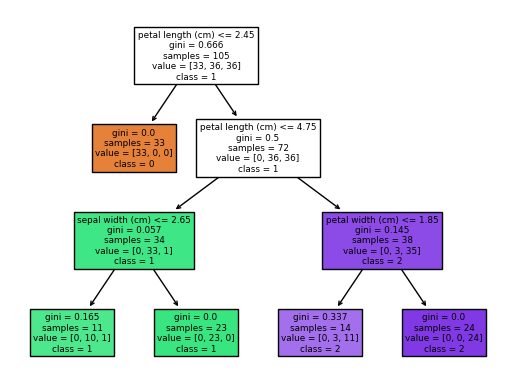

In [214]:
plot_tree(tree_output, feature_names=X_train.columns.values, class_names=['0', '1', '2'], filled=True)

In [217]:
def fit_result(param):
    tree = DecisionTreeClassifier(min_samples_leaf= param, random_state=9) #instantiation - empty object
    tree.fit(X_train, y_train) #fitted - learned
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    print('Train Accuracy: ', accuracy_score(y_train, train_pred), "Test Accuracy: ", accuracy_score(y_test, test_pred))
    return tree

In [219]:
tree_output = fit_result(param=5)

Train Accuracy:  0.9619047619047619 Test Accuracy:  0.9333333333333333


[Text(0.3333333333333333, 0.9, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]\nclass = 1'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = 0'),
 Text(0.4444444444444444, 0.7, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]\nclass = 1'),
 Text(0.2222222222222222, 0.5, 'sepal length (cm) <= 5.3\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = 1'),
 Text(0.1111111111111111, 0.3, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = 1'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = 1'),
 Text(0.6666666666666666, 0.5, 'petal width (cm) <= 1.7\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]\nclass = 2'),
 Text(0.5555555555555556, 0.3, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = 2'),
 Text(0.7777777777777778, 0.3, 'petal length (cm) <= 5.05\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = 2'),
 Text(0.6666666666666666, 0.1, 'gini = 

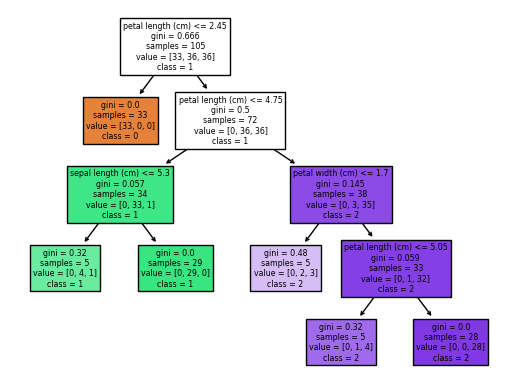

In [221]:
plot_tree(tree_output, feature_names=X_train.columns.values, class_names=['0', '1', '2'], filled=True)

### max features

In [237]:
def fit_result(param):
    tree = DecisionTreeClassifier(max_features= param, random_state=9) #instantiation - empty object
    tree.fit(X_train, y_train) #fitted - learned
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    print('Train Accuracy: ', accuracy_score(y_train, train_pred), "Test Accuracy: ", accuracy_score(y_test, test_pred))
    return tree

In [239]:
tree = fit_result(param=None)

Train Accuracy:  1.0 Test Accuracy:  0.9333333333333333


[Text(0.3333333333333333, 0.9, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]\nclass = 1'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = 0'),
 Text(0.4444444444444444, 0.7, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]\nclass = 1'),
 Text(0.2222222222222222, 0.5, 'sepal length (cm) <= 5.3\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = 1'),
 Text(0.1111111111111111, 0.3, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = 1'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = 1'),
 Text(0.6666666666666666, 0.5, 'petal width (cm) <= 1.7\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]\nclass = 2'),
 Text(0.5555555555555556, 0.3, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = 2'),
 Text(0.7777777777777778, 0.3, 'petal length (cm) <= 5.05\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = 2'),
 Text(0.6666666666666666, 0.1, 'gini = 

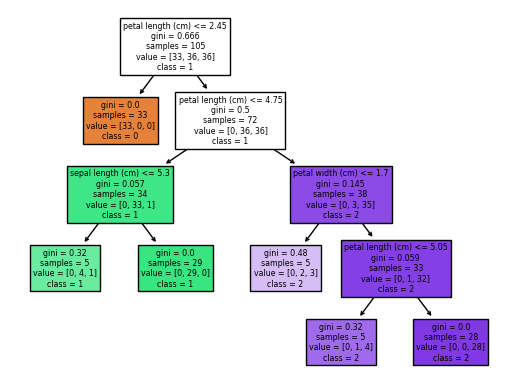

In [241]:
plot_tree(tree_output, feature_names=X_train.columns.values, class_names=['0', '1', '2'], filled=True)

In [243]:
tree = fit_result(param='sqrt')

Train Accuracy:  1.0 Test Accuracy:  0.9111111111111111


In [ ]:
RandomizedSearchCV()

In [277]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': range(0, 20),
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto','sqrt', 'log2']
}

In [279]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [281]:
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy', verbose=2)

In [283]:
import warnings
warnings.filterwarnings('ignore')

In [285]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=0; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=1; total time=   0.0

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(0, 20)},
             scoring='accuracy', verbose=2)

In [287]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 12}

In [289]:
train_pred = grid_search.best_estimator_.predict(X_train)
test_pred = grid_search.best_estimator_.predict(X_test)

In [295]:
accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)

(0.9619047619047619, 0.9333333333333333)

In [233]:
np.sqrt(100)

10.0

In [231]:
np.log2(100)

6.643856189774724